In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from Bio import Entrez
import datetime
import numpy as np
Entrez.email = "f.talarico@campus.unimib.it"


In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
taxo = Entrez.esearch(db='taxonomy',term="Naegleria_fowleri")
rtaxo = Entrez.read(taxo)
taxo.close()
rtaxo

{'Count': '1', 'RetMax': '1', 'RetStart': '0', 'IdList': ['5763'], 'TranslationSet': [], 'TranslationStack': [{'Term': 'Naegleria_fowleri[All Names]', 'Field': 'All Names', 'Count': '1', 'Explode': 'N'}, 'GROUP'], 'QueryTranslation': 'Naegleria_fowleri[All Names]'}

In [ ]:
handle = Entrez.efetch(db="taxonomy",id=5763, retmode = 'xml' )
record = Entrez.read(handle)
handle.close()
data = record[0]

In [ ]:
data

{'TaxId': '5763', 'ScientificName': 'Naegleria fowleri', 'OtherNames': {'Misnomer': [], 'Synonym': [], 'Misspelling': [], 'CommonName': ['brain-eating amoeba'], 'Inpart': [], 'GenbankAnamorph': [], 'Teleomorph': [], 'Anamorph': [], 'Acronym': [], 'GenbankSynonym': [], 'Name': [{'ClassCDE': 'authority', 'DispName': 'Naegleria fowleri Carter 1970'}], 'Includes': [], 'EquivalentName': []}, 'ParentTaxId': '5761', 'Rank': 'species', 'Division': 'Invertebrates', 'GeneticCode': {'GCId': '1', 'GCName': 'Standard'}, 'MitoGeneticCode': {'MGCId': '1', 'MGCName': 'Standard'}, 'Lineage': 'cellular organisms; Eukaryota; Discoba; Heterolobosea; Tetramitia; Eutetramitia; Vahlkampfiidae; Naegleria', 'LineageEx': [{'TaxId': '131567', 'ScientificName': 'cellular organisms', 'Rank': 'no rank'}, {'TaxId': '2759', 'ScientificName': 'Eukaryota', 'Rank': 'superkingdom'}, {'TaxId': '2611352', 'ScientificName': 'Discoba', 'Rank': 'no rank'}, {'TaxId': '5752', 'ScientificName': 'Heterolobosea', 'Rank': 'phylum'}

In [ ]:
def taxonomy(id_,retmode = 'xml'):
    """
    Mostra le principali informazioni ricavate da NCBI riguradanti la tassonomia.
    Cercare anticipantamente l'id con la funzione -- esearch --
    """
    handle = Entrez.efetch(db="taxonomy",id=id_, retmode = 'xml' )
    record = Entrez.read(handle)
    handle.close()
    chiave = record[0]
    dizionario = {}
    
    dizionario['ScientificName'] = chiave['ScientificName']
    dizionario['GenbankCommonName'] = chiave['OtherNames']['CommonName'][0]
    dizionario['Rank'] = chiave['Rank']
    dizionario['Division'] = chiave['Division']
    dizionario['organismo'] = chiave['Lineage'].split(';')[0]
    dizionario['tassonomia']={}
    dizionario['tassonomia']['dominio']=chiave['Lineage'].split(';')[1]
    dizionario['tassonomia']['regno']=chiave['Lineage'].split(';')[2]
    dizionario['tassonomia']['divisione']=chiave['Lineage'].split(';')[3]
    dizionario['tassonomia']['classe']=chiave['Lineage'].split(';')[4]
    dizionario['tassonomia']['ordine']=chiave['Lineage'].split(';')[5]
    dizionario['tassonomia']['famiglia']=chiave['Lineage'].split(';')[6]
    dizionario['tassonomia']['genere']=chiave['Lineage'].split(';')[7]
    return(dizionario)
tassonomia = taxonomy(id_= 5763)
tassonomia

{'ScientificName': 'Naegleria fowleri',
 'GenbankCommonName': 'brain-eating amoeba',
 'Rank': 'species',
 'Division': 'Invertebrates',
 'organismo': 'cellular organisms',
 'tassonomia': {'dominio': ' Eukaryota',
  'regno': ' Discoba',
  'divisione': ' Heterolobosea',
  'classe': ' Tetramitia',
  'ordine': ' Eutetramitia',
  'famiglia': ' Vahlkampfiidae',
  'genere': ' Naegleria'}}

In [ ]:
pub = Entrez.esearch(db="pubmed",term='Naegleria_fowleri', retmode = 'xml' ,retmax=803)
record_pub = Entrez.read(pub)
pub.close()


In [ ]:
data=pd.DataFrame(record_pub['IdList'],columns=['id'])

In [ ]:
def state(idl):
    try:
        articolo=Entrez.efetch(db="pubmed",term="Naegleria_fowleri",id=str(idl),rettype='xml')
        arti=Entrez.read(articolo)
        articolo.close()
        stato=arti['PubmedArticle'][0]['MedlineCitation']['MedlineJournalInfo']['Country']
        return(stato)
    except:
        return None


In [ ]:
def date_revised(idl):
    try:
        articolo=Entrez.efetch(db="pubmed",term="Naegleria_fowleri",id=str(idl),rettype='xml')
        arti=Entrez.read(articolo)
        articolo.close()
        stato=arti['PubmedArticle'][0]['MedlineCitation']['DateRevised']
        return(stato)
    except:
        return None

In [ ]:
def to_abstract(idl):
     try:
        articolo=Entrez.efetch(db="pubmed",term="Naegleria_fowleri",id=str(idl),rettype='xml')
        arti=Entrez.read(articolo)
        articolo.close()
        stato=arti['PubmedArticle'][0]['MedlineCitation']['Article']['Abstract']['AbstractText']
        return(stato)
     except:
        return None

In [ ]:
data['stato']=data['id'].apply(date_revised)

In [ ]:
data['country']=data['id'].apply(state)

In [ ]:
data['abstract_text']=data['id'].apply(to_abstract)

In [ ]:
data.to_csv(r'C:\Users\franc\Desktop\UNIVERSITA\biosciences\dati.csv', index = False)

In [ ]:
import datetime as dt

In [ ]:
date = dt.date(year=int(data.stato[1]['Year']), month=int(data.stato[1]['Month']), day=int(data.stato[1]['Day']))
date_str = date.strftime("%m/%Y")

In [ ]:
date

datetime.date(2020, 4, 30)

In [ ]:
date_str

'04/2020'

In [ ]:
def todate(data):
    try:
        date = dt.date(year=int(data['Year']), month=int(data['Month']), day=int(data['Day'])) 
        return(date)
    except:
        return None

In [ ]:
data['date']=data['stato'].apply(todate)

In [ ]:
data['date']

0      2020-04-28
2      2020-04-22
3      2020-04-10
4      2020-04-28
5      2020-03-02
          ...    
796    2019-05-01
797    2006-11-15
798    2003-11-14
799    2018-11-13
800    2018-11-13
Name: date, Length: 712, dtype: object

In [ ]:
giorni=pd.DataFrame(data.groupby(['date'],as_index=False).count())

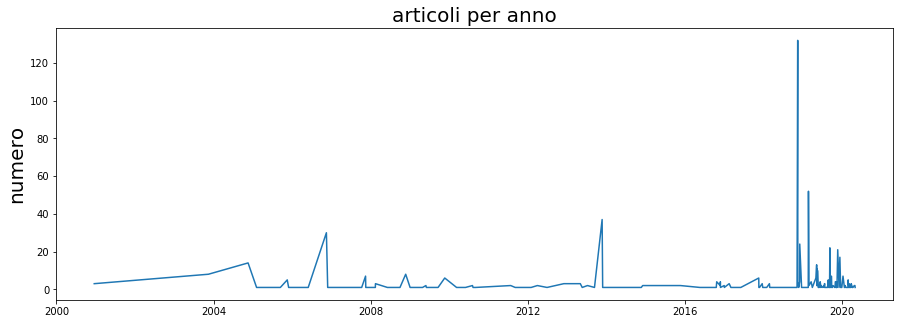

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(giorni['date'],giorni['id'])
plt.ylabel('numero', size = 20)
plt.title('articoli per anno', size = 20)
#datemin = datetime(2000, 1, 1)
#datemax = datetime(2020, 5, 2) 
#ax.set_xlim(datemin, datemax)
#plt.xlim(date.year(2000))
#plt.xticks(np.arange(21),range(2000,2020))
#plt.xticks(rotation=10)
plt.show()

In [ ]:
stati=pd.DataFrame(data.groupby(['country'],as_index=False).count())

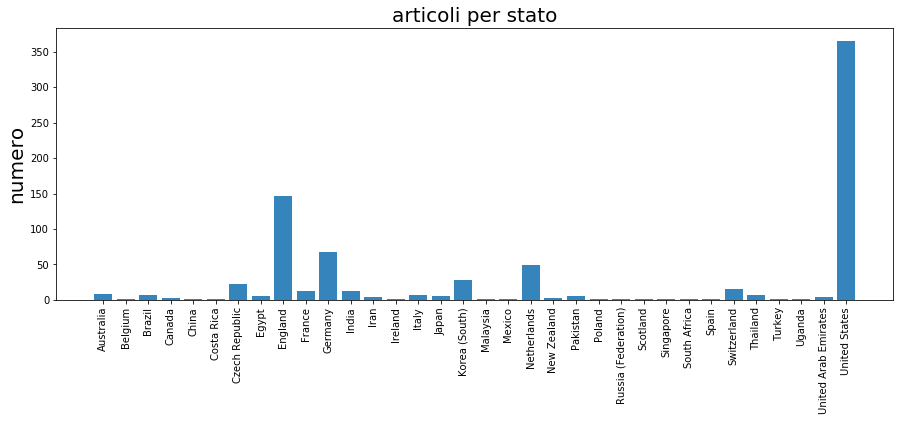

In [ ]:
x_lab = stati.country
y_val = stati.id
x_range = np.arange(len(x_lab))
plt.figure(figsize=(15,5))
plt.bar(x_range, y_val, align='center', alpha=0.9, )
plt.xticks(x_range, x_lab, rotation='vertical')
plt.ylabel('numero', size = 20)
plt.title('articoli per stato', size = 20)
plt.show()

## LAVORIAMO COL TESTO

In [ ]:
# Load the regular expression library
from nltk.tokenize import  word_tokenize 
import re
from nltk.corpus import stopwords 

In [ ]:
data=data.dropna()

In [ ]:
data

,id,stato,country,abstract_text,date
0,32342421,"{'Year': '2020', 'Month': '04', 'Day': '28'}",Germany,[Free-living amoebae (FLA) including Acanthamo...,2020-04-28
2,32316387,"{'Year': '2020', 'Month': '04', 'Day': '22'}",Switzerland,[<i>Balamuthia mandrillaris</i> and <i>Naegler...,2020-04-22
3,32196500,"{'Year': '2020', 'Month': '04', 'Day': '10'}",United States,[Parasitic infections are a major source of hu...,2020-04-10
4,32191816,"{'Year': '2020', 'Month': '04', 'Day': '28'}",England,[Many pathogenicity factors are involved in th...,2020-04-28
5,32073257,"{'Year': '2020', 'Month': '03', 'Day': '02'}",United States,[Brain-eating amoebae including <i>Acanthamoeb...,2020-03-02
...,...,...,...,...,...
796,1141444,"{'Year': '2019', 'Month': '05', 'Day': '01'}",England,[The sensitivity of 18 strains of Naegleria fo...,2019-05-01
797,805226,"{'Year': '2006', 'Month': '11', 'Day': '15'}",United States,[Studies were conducted on 27 Old World monkey...,2006-11-15
798,829907,"{'Year': '2003', 'Month': '11', 'Day': '14'}",United States,[The 161A strain of Naegleria isolated from th...,2003-11-14
799,803926,"{'Year': '2018', 'Month': '11', 'Day': '13'}",United States,[Antigens prepared from each of five strains (...,2018-11-13


In [ ]:
data['string'] = data['abstract_text'].apply(lambda x: ''.join(map(str, x)))

In [ ]:
data

,id,stato,country,abstract_text,date,string,abstract_text_processed,token_text,string_text,anno
0,32342421,"{'Year': '2020', 'Month': '04', 'Day': '28'}",Germany,[Free-living amoebae (FLA) including Acanthamo...,2020-04-28,Free-living amoebae (FLA) including Acanthamoe...,free-living amoebae fla including acanthamoe...,"[free-living, amoebae, fla, including, acantha...",free-living amoebae fla including acanthamoeba...,2020
2,32316387,"{'Year': '2020', 'Month': '04', 'Day': '22'}",Switzerland,[<i>Balamuthia mandrillaris</i> and <i>Naegler...,2020-04-22,<i>Balamuthia mandrillaris</i> and <i>Naegleri...,<i>balamuthia mandrillaris< i> and <i>naegleri...,"[balamuthia, mandrillaris, naegleria, fowleri,...",balamuthia mandrillaris naegleria fowleri oppo...,2020
3,32196500,"{'Year': '2020', 'Month': '04', 'Day': '10'}",United States,[Parasitic infections are a major source of hu...,2020-04-10,Parasitic infections are a major source of hum...,parasitic infections are a major source of hum...,"[parasitic, infections, major, source, human, ...",parasitic infections major source human suffer...,2020
4,32191816,"{'Year': '2020', 'Month': '04', 'Day': '28'}",England,[Many pathogenicity factors are involved in th...,2020-04-28,Many pathogenicity factors are involved in the...,many pathogenicity factors are involved in the...,"[many, pathogenicity, factors, involved, devel...",many pathogenicity factors involved developmen...,2020
5,32073257,"{'Year': '2020', 'Month': '03', 'Day': '02'}",United States,[Brain-eating amoebae including <i>Acanthamoeb...,2020-03-02,Brain-eating amoebae including <i>Acanthamoeba...,brain-eating amoebae including <i>acanthamoeba...,"[brain-eating, amoebae, including, acanthamoeb...",brain-eating amoebae including acanthamoeba sp...,2020
...,...,...,...,...,...,...,...,...,...,...
796,1141444,"{'Year': '2019', 'Month': '05', 'Day': '01'}",England,[The sensitivity of 18 strains of Naegleria fo...,2019-05-01,The sensitivity of 18 strains of Naegleria fow...,the sensitivity of strains of naegleria fowle...,"[sensitivity, strains, naegleria, fowleri, clo...",sensitivity strains naegleria fowleri clotrima...,2019
797,805226,"{'Year': '2006', 'Month': '11', 'Day': '15'}",United States,[Studies were conducted on 27 Old World monkey...,2006-11-15,Studies were conducted on 27 Old World monkeys...,studies were conducted on old world monkeys t...,"[studies, conducted, old, world, monkeys, dete...",studies conducted old world monkeys determine ...,2006
798,829907,"{'Year': '2003', 'Month': '11', 'Day': '14'}",United States,[The 161A strain of Naegleria isolated from th...,2003-11-14,The 161A strain of Naegleria isolated from the...,the a strain of naegleria isolated from the na...,"[strain, naegleria, isolated, nasal, swab, boy...",strain naegleria isolated nasal swab boy grown...,2003
799,803926,"{'Year': '2018', 'Month': '11', 'Day': '13'}",United States,[Antigens prepared from each of five strains (...,2018-11-13,Antigens prepared from each of five strains (C...,antigens prepared from each of five strains c...,"[antigens, prepared, five, strains, hb-, hb-, ...",antigens prepared five strains hb- hb- pathoge...,2018


In [ ]:
# Remove punctuation
data['abstract_text_processed'] = data['string'].map(lambda x: re.sub('[,\.!?()/|_]', ' ', x))

In [ ]:
data['abstract_text_processed']=data['abstract_text_processed'].map(lambda x: x.lower())

In [ ]:
data['abstract_text_processed']=data['abstract_text_processed'].apply(lambda x: re.sub(r'\d+', '', x)) #eliminiamo numeri

In [ ]:
data['token_text']=data['abstract_text_processed'].apply(word_tokenize)        

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
mystop=['year','pegfp','month','hb','one','two','naegleria','fowleri','naegleria fowleri','day','pam','spp','nfa']

In [ ]:
stop_words=stop_words.union(mystop)

In [ ]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'day',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'fowleri',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'hb',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'month',
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'naegleria',
 'naegleria fowleri',
 'needn',
 "needn't",
 'nfa',
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:

for ndoc in data.index:                    
    data['token_text'][ndoc]=[w for w in data['token_text'][ndoc] if len(w)>2]
    data['token_text'][ndoc]=[w for w in data['token_text'][ndoc] if not w in stop_words]

C:\Users\franc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\franc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
lemmatizer=WordNetLemmatizer()
for ndoc in data.index:
    data['token_text'][ndoc]=[lemmatizer.lemmatize(w) for w in data['token_text'][ndoc]]

C:\Users\franc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud


In [ ]:
data['string_text']=data['token_text'].apply(lambda x: ' '.join(map(str, x)))

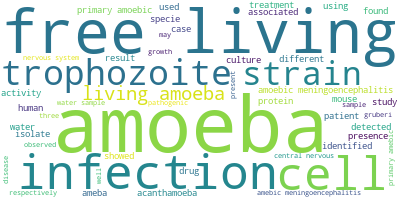

In [ ]:
# Join the different processed titles together.
long_string = ' '.join(list(data['string_text'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=50, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


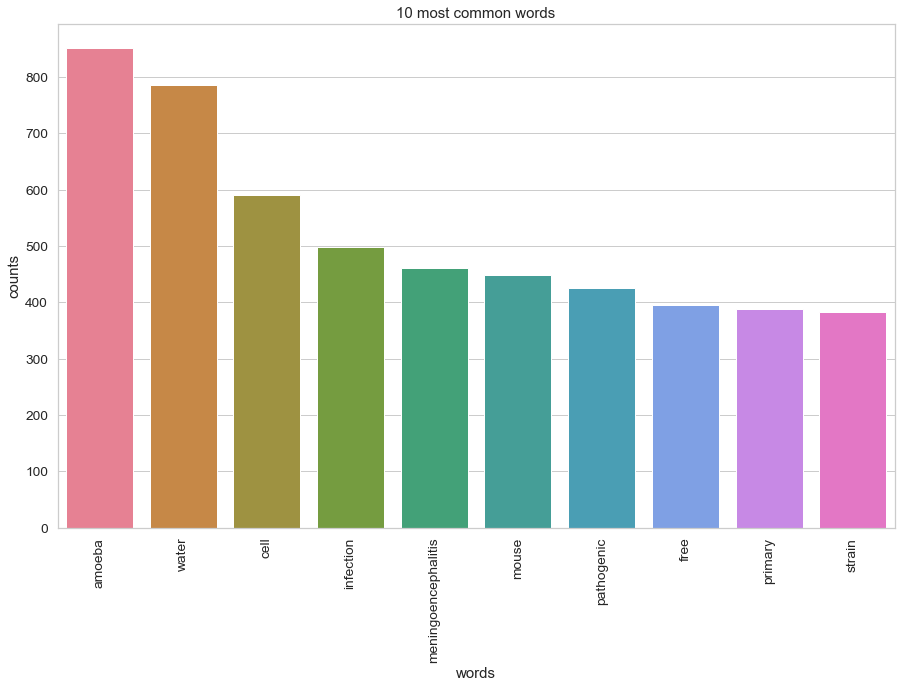

In [ ]:
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer()
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(data['string_text'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [ ]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [ ]:
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 5
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
outbreak water associated cell protein gruberi system il gene trophozoite

Topic #1:
specie strain dna pcr method sequence detection isolates using australiensis

Topic #2:
drug protein activity effect cell compound amphotericin acid agent human

Topic #3:
water amoeba case infection meningoencephalitis acanthamoeba free sample living primary

Topic #4:
mouse cell amoeba medium trophozoite strain serum antibody pathogenic group


## ANALISI TESTUALE PER NAZIONE

USA

In [ ]:
usa=data[data['country']=='United States']

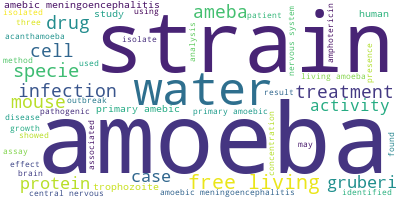

In [ ]:
# Join the different processed titles together.
long_string_usa = ' '.join(list(usa['string_text'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=50, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string_usa)
# Visualize the word cloud
wordcloud.to_image()

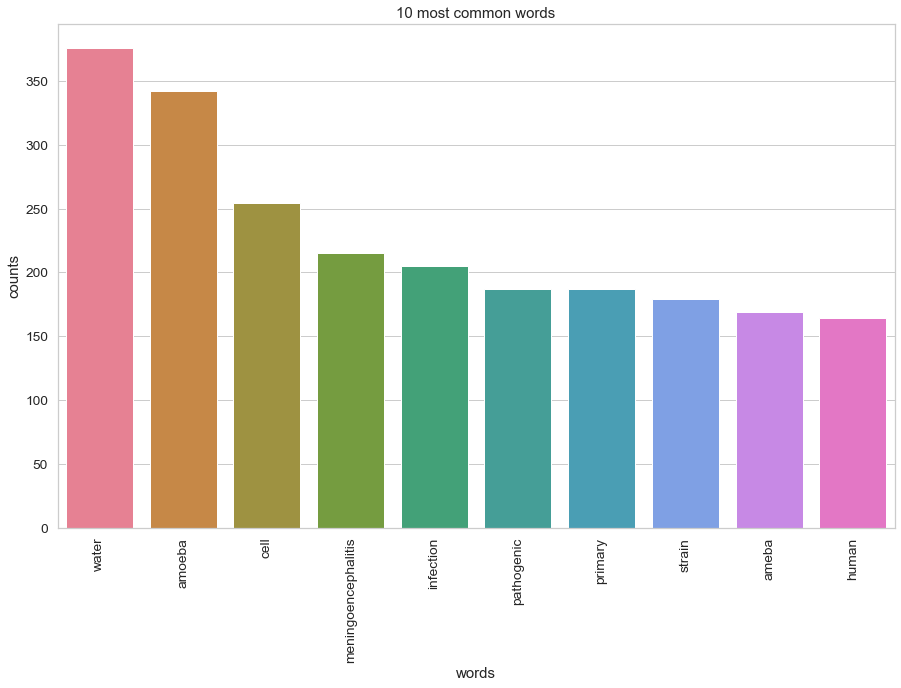

In [ ]:
# Fit and transform the processed titles
count_data_usa = count_vectorizer.fit_transform(usa['string_text'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data_usa, count_vectorizer)

In [ ]:
number_topics = 5
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data_usa)
# Print the topics found by the LDA model
print("Topics found via LDA in usa:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA in usa:

Topic #0:
mouse amoeba cell meningoencephalitis protein primary amoebic trophozoite amphotericin gruberi

Topic #1:
drug effect amphotericin human treatment medium acid effective pfp also

Topic #2:
strain cell amoeba pathogenic protein specie serum gruberi medium ameba

Topic #3:
water meningoencephalitis case infection primary amebic free living sample ameba

Topic #4:
water outbreak drug activity associated amoeba system acanthamoeba caused effect


NOT USA

In [ ]:
notusa=data[data['country']!='United States']

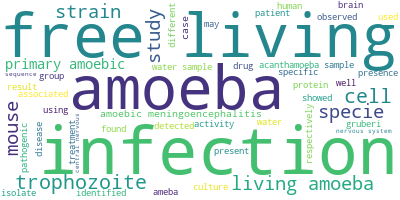

In [ ]:
# Join the different processed titles together.
long_string_nu = ' '.join(list(notusa['string_text'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=50, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string_nu)
# Visualize the word cloud
wordcloud.to_image()

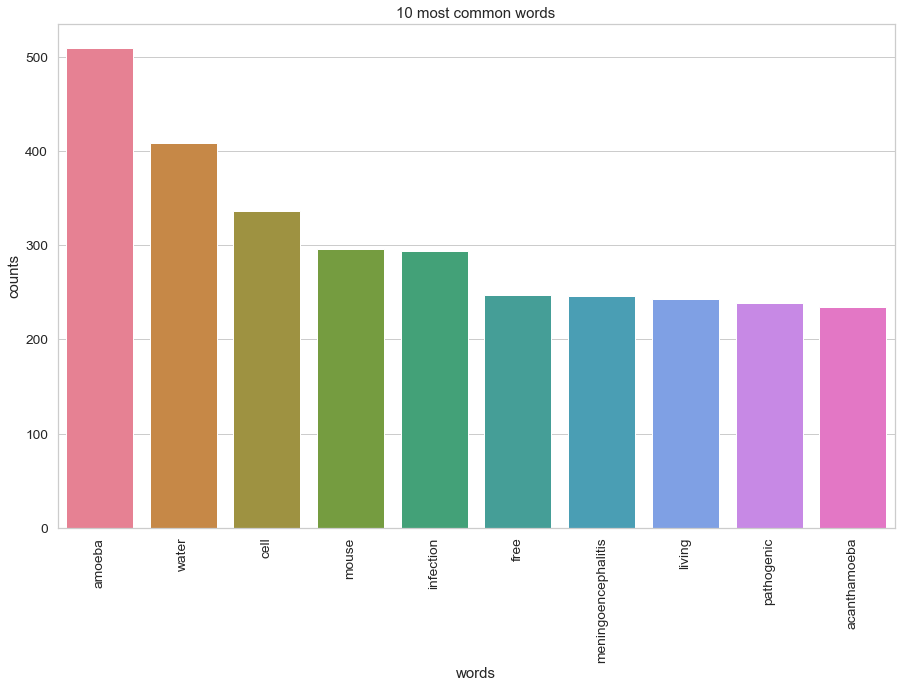

In [ ]:
# Fit and transform the processed titles
count_data_nu = count_vectorizer.fit_transform(notusa['string_text'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data_nu, count_vectorizer)

In [ ]:
number_topics = 5
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data_nu)
# Print the topics found by the LDA model
print("Topics found via LDA in England:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA in England:

Topic #0:
study amoeba drug assay detection nanoparticles pathogenic surface compound concentration

Topic #1:
strain specie amoeba pathogenic sequence sample genus water isolates dna

Topic #2:
protein amoeba cell macrophage activity parasite enzyme target result culture

Topic #3:
mouse cell trophozoite amoeba group infection antibody amoebic meningoencephalitis showed

Topic #4:
water amoeba case acanthamoeba infection meningoencephalitis free living sample primary


ENGLAND

In [ ]:
england=data[data['country']=='England']

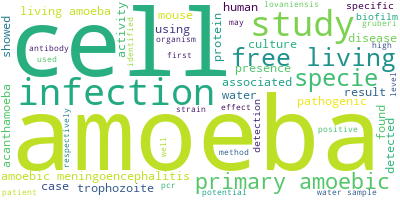

In [ ]:
# Join the different processed titles together.
long_string_en = ' '.join(list(england['string_text'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=50, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string_en)
# Visualize the word cloud
wordcloud.to_image()

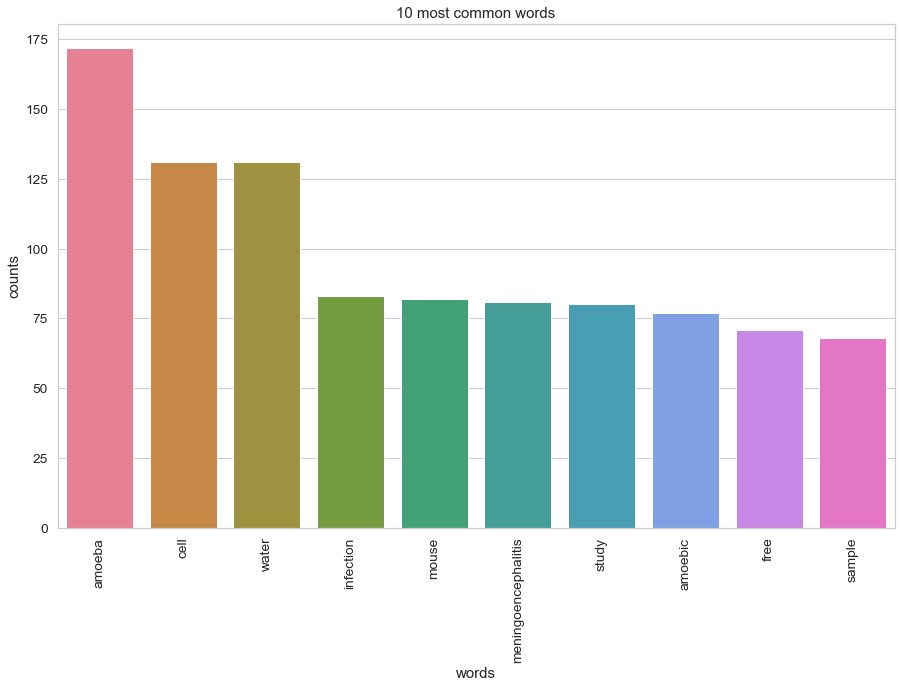

In [ ]:
# Fit and transform the processed titles
count_data_en = count_vectorizer.fit_transform(england['string_text'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data_en, count_vectorizer)

In [ ]:
number_topics = 5
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data_en)
# Print the topics found by the LDA model
print("Topics found via LDA in England:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA in England:

Topic #0:
water amoeba legionella cell pathogenic acanthamoeba coli potential presence study

Topic #1:
amoeba disease water case infection system meningoencephalitis amoebic primary first

Topic #2:
cell amoeba mouse trophozoite amoebic protein result antibody activity nasal

Topic #3:
amoeba water sample study living specie pathogenic free acanthamoeba genome

Topic #4:
meningoencephalitis infection water case primary amoebic patient disease clinical sample


# PER ANNO , PRIMA E POST 2016

In [ ]:
def anno(diz):
    anno=int(diz['Year'])
    return(anno)

In [ ]:
data['anno']=data['stato'].apply(anno)

In [ ]:
recente=data[data['anno']>2015]

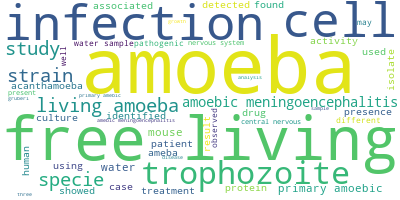

In [ ]:
# Join the different processed titles together.
long_string_recente = ' '.join(list(recente['string_text'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=50, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string_recente)
# Visualize the word cloud
wordcloud.to_image()

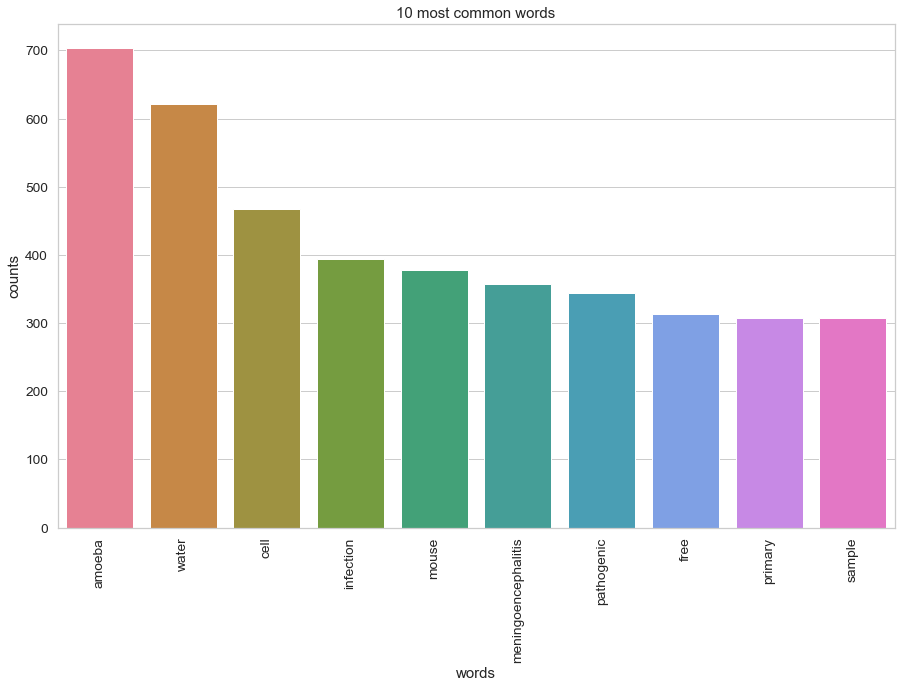

In [ ]:
# Fit and transform the processed titles
count_data_recente = count_vectorizer.fit_transform(recente['string_text'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data_recente, count_vectorizer)

In [ ]:
number_topics = 5
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data_recente)
# Print the topics found by the LDA model
print("Topics found via LDA recentemente:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA recentemente:

Topic #0:
protein amoeba cell gene human kda pathogenic gruberi strain anti

Topic #1:
mouse cell amoeba trophozoite infection antibody meningoencephalitis group amoebic response

Topic #2:
water sample amoeba infection case free meningoencephalitis acanthamoeba living drug

Topic #3:
medium amoeba strain pathogenic activity specie cell macrophage gruberi amoebicidal

Topic #4:
water outbreak associated primary case strain meningoencephalitis patient system identified


In [ ]:
vecchio=data[data['anno']<=2015]

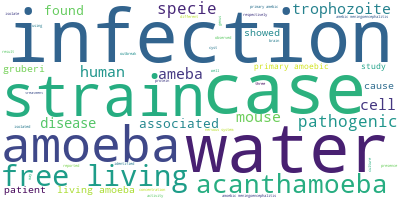

In [ ]:
# Join the different processed titles together.
long_string_vecchio = ' '.join(list(vecchio['string_text'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=50, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string_vecchio)
# Visualize the word cloud
wordcloud.to_image()

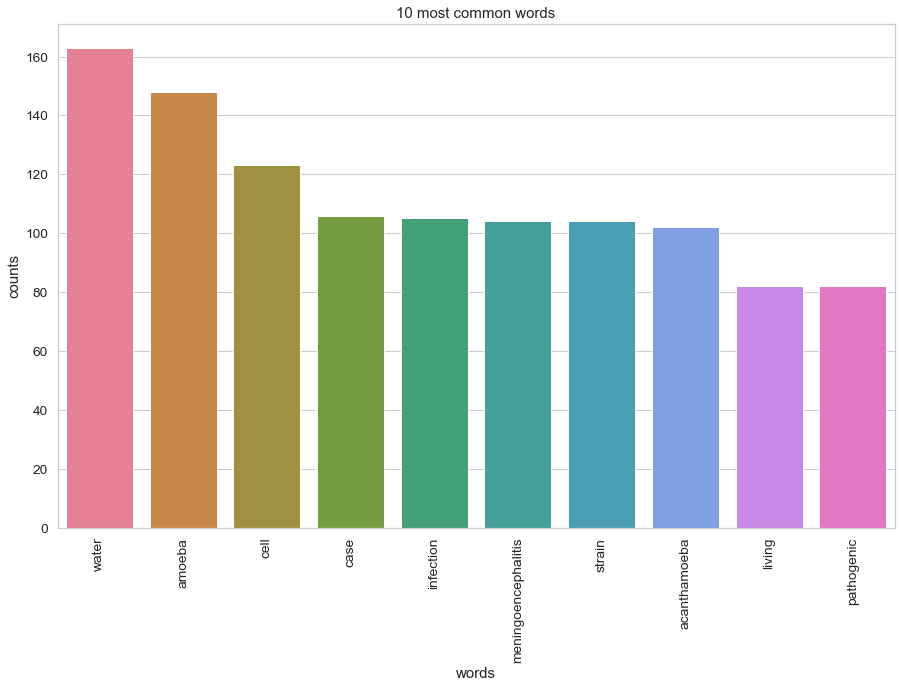

In [ ]:
# Fit and transform the processed titles
count_data_vecchio = count_vectorizer.fit_transform(vecchio['string_text'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data_vecchio, count_vectorizer)

In [ ]:
number_topics = 5
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data_vecchio)
# Print the topics found by the LDA model
print("Topics found via LDA prima del 2016:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA prima del 2016:

Topic #0:
infection acanthamoeba case meningoencephalitis water amoeba living primary free amebic

Topic #1:
water outbreak strain associated cell mouse amoeba recreational isolated pathogenic

Topic #2:
specie amoeba pathogenic strain trophozoite protein gruberi nasal cyst protease

Topic #3:
cell trophozoite amoeba strain virulence culture ameba medium mouse showed

Topic #4:
concentration drug effect cell pfp amphotericin protein ameba respectively vitro
